# Loading DataSet

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Heart.csv')
df.head()

,AGE,SEX,CHEST PAIN TYPE,RESTING BLOOD PRESSURE,SERUM CHOLESTORAL(mg/dl),FASTING BLOOD SUGAR and gt,RESTING ELECTROCARDIOGRAPHIC RESULTS,MAXIMUM HEART RATE ACHIEVED,EXERCISE INDUCED ANGINA (1=YES ; 0=NO),ST DEPRESSION INDUCED BY EXERCISE RELATIVE TO REST,THE SLOPE OF THE PEAK EXERCISE ST SEGMENT,NUMBER OF MAJOR VESSELS(0-3)COLORED BY FLOURUSOPY,1 = NORMAL; 2 = FIXED DEFECT; 3 = REVERSABLE DEFECTt,TARGET
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   AGE                                                   1025 non-null   int64  
 1   SEX                                                   1025 non-null   int64  
 2   CHEST PAIN TYPE                                       1025 non-null   int64  
 3   RESTING BLOOD PRESSURE                                1025 non-null   int64  
 4   SERUM CHOLESTORAL(mg/dl)                              1025 non-null   int64  
 5   FASTING BLOOD SUGAR and gt                            1025 non-null   int64  
 6   RESTING ELECTROCARDIOGRAPHIC RESULTS                  1025 non-null   int64  
 7   MAXIMUM HEART RATE ACHIEVED                           1025 non-null   int64  
 8   EXERCISE INDUCED ANGINA (1=YES ; 0=NO)                1025

In [4]:
df.columns

Index(['AGE', 'SEX', 'CHEST PAIN TYPE', 'RESTING BLOOD PRESSURE',
       'SERUM CHOLESTORAL(mg/dl)', 'FASTING BLOOD SUGAR and gt',
       'RESTING ELECTROCARDIOGRAPHIC RESULTS', 'MAXIMUM HEART RATE ACHIEVED',
       'EXERCISE INDUCED ANGINA (1=YES ; 0=NO)',
       'ST DEPRESSION INDUCED BY EXERCISE RELATIVE TO REST',
       'THE SLOPE OF THE PEAK EXERCISE ST SEGMENT',
       'NUMBER OF MAJOR VESSELS(0-3)COLORED BY FLOURUSOPY',
       '1 = NORMAL; 2 = FIXED DEFECT; 3 = REVERSABLE DEFECTt', 'TARGET'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS

In [5]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [6]:
import ydata_profiling as pp

In [7]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# MODEL PREPARATION 

# DATA SPLITTING

In [8]:
x = df.drop('TARGET',axis=1)
y = df['TARGET']

In [9]:
x

,AGE,SEX,CHEST PAIN TYPE,RESTING BLOOD PRESSURE,SERUM CHOLESTORAL(mg/dl),FASTING BLOOD SUGAR and gt,RESTING ELECTROCARDIOGRAPHIC RESULTS,MAXIMUM HEART RATE ACHIEVED,EXERCISE INDUCED ANGINA (1=YES ; 0=NO),ST DEPRESSION INDUCED BY EXERCISE RELATIVE TO REST,THE SLOPE OF THE PEAK EXERCISE ST SEGMENT,NUMBER OF MAJOR VESSELS(0-3)COLORED BY FLOURUSOPY,1 = NORMAL; 2 = FIXED DEFECT; 3 = REVERSABLE DEFECTt
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [10]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: TARGET, Length: 1025, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0)

Before applying algorithm we should check whether the data is equally splitted or not, because if data is not splitted equally it will cause for data imbalacing problem

In [13]:
from collections import Counter
print(y_test.unique())
Counter(y_train)

[1 0]


Counter({1: 419, 0: 401})

# DATA PREPROCESSING

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ML MODELS

In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

# 1) Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
model1= 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_confusion_matrix = confusion_matrix(y_test, lr_predict)
lr_accuracy_score = accuracy_score(y_test, lr_predict)
print("confusion matrix")
print(lr_confusion_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_accuracy_score*100,'\n')
print('--------------------Classification Report-------------------------')
print()
print(classification_report(y_test,lr_predict))

confusion matrix
[[ 77  21]
 [  7 100]]


Accuracy of Logistic Regression: 86.34146341463415 

--------------------Classification Report-------------------------

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



# 2) Naive Baye's

In [18]:
from sklearn.naive_bayes import GaussianNB
model2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_pred = nb.predict(X_test)
nb_confusion_matrix = confusion_matrix(y_test, nb_pred)
nb_accuracy_score = accuracy_score(y_test, nb_pred)
print("confusion matrix")
print(nb_confusion_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_accuracy_score*100,'\n')
print('--------------------Classification Report-------------------------')
print()
print(classification_report(y_test,nb_pred))

confusion matrix
[[79 19]
 [11 96]]


Accuracy of Naive Bayes model: 85.36585365853658 

--------------------Classification Report-------------------------

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        98
           1       0.83      0.90      0.86       107

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



# 3) Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
model3= 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_confusion_matrix = confusion_matrix(y_test, rf_predicted)
rf_accuracy_score = accuracy_score(y_test, rf_predicted)
print("confusion matrix")
print(rf_confusion_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_accuracy_score*100,'\n')
print('--------------------Classification Report-------------------------')
print()
print(classification_report(y_test,rf_predicted))

confusion matrix
[[ 88  10]
 [  3 104]]


Accuracy of Random Forest: 93.65853658536587 

--------------------Classification Report-------------------------

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        98
           1       0.91      0.97      0.94       107

    accuracy                           0.94       205
   macro avg       0.94      0.93      0.94       205
weighted avg       0.94      0.94      0.94       205



# 4) Extreme Gradient Boost

In [20]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [21]:
from xgboost import XGBClassifier
model4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                   reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_confusion_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_accuracy_score = accuracy_score(y_test, xgb_predicted)
print("confusion matrix")
print(xgb_confusion_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_accuracy_score*100,'\n')
print('--------------------Classification Report-------------------------')
print()
print(classification_report(y_test,xgb_predicted))

confusion matrix
[[ 89   9]
 [  2 105]]


Accuracy of Extreme Gradient Boost: 94.6341463414634 

--------------------Classification Report-------------------------

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        98
           1       0.92      0.98      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.94      0.95       205
weighted avg       0.95      0.95      0.95       205



In [22]:
importances = list(zip(xgb.feature_importances_,df.columns))
importances.sort(reverse=True)
importances

[(0.19469088, 'CHEST PAIN TYPE'),
 (0.15297356, 'EXERCISE INDUCED ANGINA (1=YES ; 0=NO)'),
 (0.14417382, 'NUMBER OF MAJOR VESSELS(0-3)COLORED BY FLOURUSOPY'),
 (0.09111609, '1 = NORMAL; 2 = FIXED DEFECT; 3 = REVERSABLE DEFECTt'),
 (0.07528849, 'ST DEPRESSION INDUCED BY EXERCISE RELATIVE TO REST'),
 (0.069445446, 'MAXIMUM HEART RATE ACHIEVED'),
 (0.066402115, 'THE SLOPE OF THE PEAK EXERCISE ST SEGMENT'),
 (0.065524384, 'SEX'),
 (0.03892147, 'AGE'),
 (0.02894936, 'SERUM CHOLESTORAL(mg/dl)'),
 (0.026838798, 'RESTING ELECTROCARDIOGRAPHIC RESULTS'),
 (0.026230818, 'RESTING BLOOD PRESSURE'),
 (0.019444812, 'FASTING BLOOD SUGAR and gt')]

# 5) Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
model5= 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion ='entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_confusion_matrix = confusion_matrix(y_test, dt_predicted)
dt_accuracy_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_confusion_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_accuracy_score*100,'\n')
print('--------------------Classification Report-------------------------')
print()
print(classification_report(y_test,dt_predicted))

confussion matrix
[[95  3]
 [ 8 99]]


Accuracy of DecisionTreeClassifier: 94.6341463414634 

--------------------Classification Report-------------------------

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        98
           1       0.97      0.93      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



# 6) K-Nearest Neighbour

In [24]:
from sklearn.neighbors import KNeighborsClassifier
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_confusion_matrix = confusion_matrix(y_test, knn_predicted)
knn_accuracy_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_confusion_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_accuracy_score*100,'\n')
print('--------------------Classification Report-------------------------')
print()
print(classification_report(y_test,knn_predicted))


confussion matrix
[[84 14]
 [11 96]]


Accuracy of K-NeighborsClassifier: 87.8048780487805 

--------------------Classification Report-------------------------

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        98
           1       0.87      0.90      0.88       107

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



# 7) Support Vector Machine

In [25]:
from sklearn.svm import SVC
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_confusion_matrix = confusion_matrix(y_test, svc_predicted)
svc_accuracy_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_confusion_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_accuracy_score*100,'\n')
print('--------------------Classification Report-------------------------')
print()
print(classification_report(y_test,svc_predicted))

confussion matrix
[[ 94   4]
 [  0 107]]


Accuracy of Support Vector Classifier: 98.04878048780488 

--------------------Classification Report-------------------------

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        98
           1       0.96      1.00      0.98       107

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



# VISUALIZATIONS

In [26]:
import matplotlib.pyplot as plt

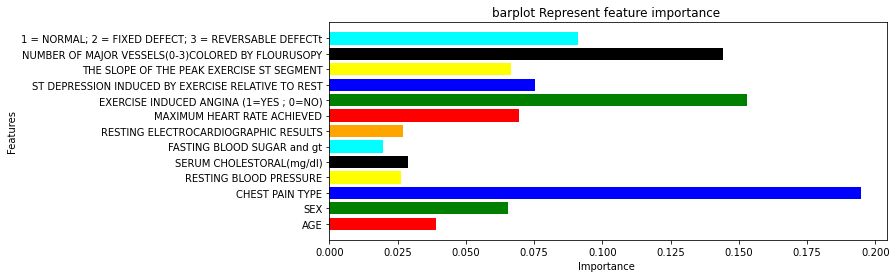

In [27]:
df1 = pd.DataFrame({'Feature':['AGE', 'SEX', 'CHEST PAIN TYPE', 'RESTING BLOOD PRESSURE','SERUM CHOLESTORAL(mg/dl)', 
                            'FASTING BLOOD SUGAR and gt','RESTING ELECTROCARDIOGRAPHIC RESULTS', 'MAXIMUM HEART RATE ACHIEVED',
                            'EXERCISE INDUCED ANGINA (1=YES ; 0=NO)','ST DEPRESSION INDUCED BY EXERCISE RELATIVE TO REST',
                            'THE SLOPE OF THE PEAK EXERCISE ST SEGMENT','NUMBER OF MAJOR VESSELS(0-3)COLORED BY FLOURUSOPY',
                            '1 = NORMAL; 2 = FIXED DEFECT; 3 = REVERSABLE DEFECTt'],'Importance': xgb.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("Importance ")
plt.ylabel("Features")
df1_sorted = df1.sort_values('Importance')
c = ['red','green','blue','yellow', 'black', 'cyan', 'orange']
plt.barh(df1['Feature'],df1['Importance'],color = c)
plt.show()

In [28]:
import seaborn as sns

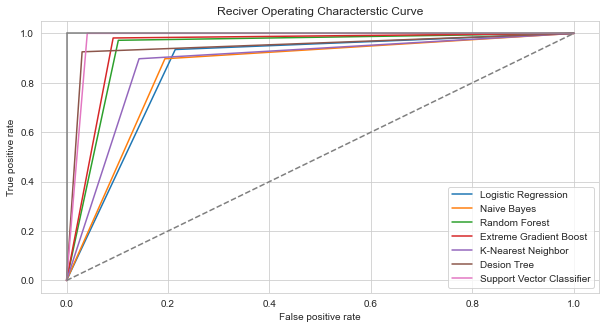

In [29]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nb_pred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [30]:
model_evaluation = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_accuracy_score*100,
                    nb_accuracy_score*100,rf_accuracy_score*100,xgb_accuracy_score*100,dt_accuracy_score*100,knn_accuracy_score*100,svc_accuracy_score*100]})
print('----------Model Evaluation-----------')
model_evaluation

----------Model Evaluation-----------


,Model,Accuracy
0,Logistic Regression,86.341463
1,Naive Bayes,85.365854
2,Random Forest,93.658537
3,Extreme Gradient Boost,94.634146
4,K-Nearest Neighbour,94.634146
5,Decision Tree,87.804878
6,Support Vector Machine,98.048780


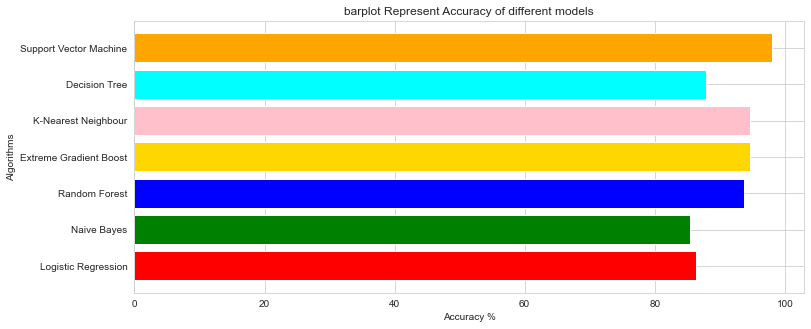

In [31]:
colors = ['red','green','blue','gold','pink','cyan','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.barh(model_evaluation['Model'],model_evaluation['Accuracy'],color = colors)
plt.show()

# Ensembling

In order to increase the accuracy of the model we use ensembling. Here we use stacking technique.

In [32]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [33]:
from mlxtend.classifier import StackingCVClassifier

In [34]:
scv=StackingCVClassifier(classifiers=[xgb,knn,svc],meta_classifier= svc,random_state=42)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_confusion_matrix = confusion_matrix(y_test, scv_predicted)
scv_accuracy_score = accuracy_score(y_test, scv_predicted)
print("confusion matrix")
print(scv_confusion_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_accuracy_score*100,'\n')
print('--------------------Classification Report-------------------------')
print()
print(classification_report(y_test,scv_predicted))

confusion matrix
[[ 94   4]
 [  0 107]]


Accuracy of StackingCVClassifier: 98.04878048780488 

--------------------Classification Report-------------------------

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        98
           1       0.96      1.00      0.98       107

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205

